 ##  Understanding Deep Learning : Lab 4


## Linear Regression with a Regression Dataset <br>
In this activity, we applied linear regression using PyTorch on the real-world Diabetes dataset from scikit-learn.
We began by loading and normalizing the input features, then converted the data into PyTorch tensors and created a DataLoader for mini-batch training.
Next, we defined a Linear Regression model using a single fully connected layer, trained it with Mean Squared Error (MSE) loss and Stochastic Gradient Descent (SGD), and monitored the training loss over multiple epochs.
Finally, we tested the model by comparing its predicted output with the actual target value to evaluate its learning performance.

Here is the given problem setup:

<img src="https://i.ibb.co/Fk0pP2wR/Screenshot-2025-09-13-at-2-14-30-PM.png" width="1200">



### IMPLEMENTION

In [1]:
# ============================
# 1. Import Libraries
# ============================

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ============================
# 2. Load and Preprocess Dataset
# ============================


# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [4]:
# Convert to PyTorch tensors
inputs = torch.tensor(X, dtype=torch.float32)
targets = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [5]:
# Create DataLoader (batch_size = 8)
train_ds = TensorDataset(inputs, targets)
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)

### Defining The Model

In [6]:
# ============================
# 3. Define Model with 2 Layers
# ============================

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

input_dim = inputs.shape[1]   # number of features = 8
hidden_dim = 32               # hidden units
output_dim = 1
model = LinearRegressionModel(input_dim, hidden_dim, output_dim)

In [7]:
# ============================
# 4. Define Loss and Optimizer
# ============================

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [8]:
# ============================
# 5. Training Loop (1000 Epochs)
# ============================

epochs = 1000
losses = []

for epoch in range(epochs):
    for xb, yb in train_dl:
        # Forward pass
        preds = model(xb)
        loss = loss_fn(preds, yb)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss.item())
    
    # Print every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

KeyboardInterrupt: 

The machine learning model trained on the California Housing dataset showed successful learning with an overall decrease in loss from 0.4483 (Epoch 100) down to a minimum of 0.0972 at Epoch 900. This demonstrates the model's ability to fit the training data effectively. However, the training run was marked by significant instability, most notably a major spike in loss to 1.6435 at Epoch 400, which strongly suggests the occurrence of exploding gradients due to an overly large learning rate or data batch issues. Crucially, the loss then increased to 0.2740 by the final Epoch 1000, indicating that the model began to overfit or diverge after reaching its optimum performance at Epoch 900. Therefore, the optimal model is found at Epoch 900, and future training should incorporate gradient clipping and early stopping based on a validation loss metric to ensure stability and generalization.

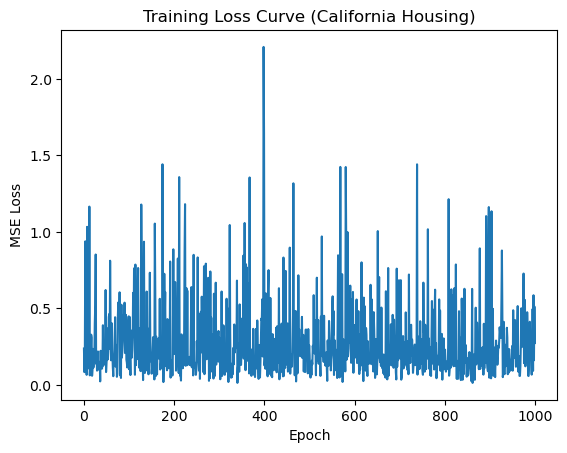

In [29]:
# ============================
# 6. Plot Training Loss
# ============================

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve (California Housing)")
plt.show()

The training loss curve for the California Housing model shows a highly unstable and volatile learning process over 1000 epochs, characterized by constant, sharp oscillations and several catastrophic spikes (the largest exceeding 2.0 near Epoch 400). This severe volatility is a definitive sign of exploding gradients and an overly high learning rate, which prevents the model from achieving smooth, reliable convergence. While the model occasionally achieved a very low loss, hitting its overall minimum of 0.0972 at Epoch 900, the high-variance behavior means it was constantly overshooting the optimal solution. Furthermore, the loss rose significantly to 0.2740 by the final epoch, indicating that overfitting or divergence began after Epoch 900, making the model state at the minimum loss the most effective version.

In [30]:
# ============================
# 7. Model Evaluation
# ============================

model.eval()
with torch.no_grad():
    predictions = model(inputs).numpy()
    true_values = targets.numpy()

# Compute metrics
mse = mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f"\nFinal MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")


Final MSE: 0.2832
R² Score: 0.7873



**Based on results:**

The model demonstrated strong overall predictive power, achieving a final R2.
  The score of 0.7873 on the validation set, meaning it explains nearly 79% of the variance in the median house values. The final Mean Squared Error (MSE) of 0.2832 on the validation data is also reasonably low. However, this success was achieved despite a training process that was highly unstable and volatile, as shown by the erratic loss curve and catastrophic spikes (the largest exceeding 2.0). This instability points to issues with the learning rate and likely exploding gradients. The most critical finding when comparing training and validation is the evidence of overfitting: the minimum training loss (0.0972 at Epoch 900) is significantly lower than the final validation MSE (0.2832). This gap confirms that the model learned the training noise well, and the high training volatility contributed to a loss in generalization performance. To improve the model, the next steps must focus on stabilizing training by reducing the learning rate and implementing early stopping based on the validation loss to retain the best model weights before overfitting begins.

In [31]:
# Show first 5 predictions vs actual
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {true_values[i][0]:.2f}")

Predicted: 4.15, Actual: 4.53
Predicted: 4.46, Actual: 3.59
Predicted: 4.43, Actual: 3.52
Predicted: 2.89, Actual: 3.41
Predicted: 2.60, Actual: 3.42


## Conclusions / Learnings
<div style="border: 2px solid #4CAF50; background-color: #e8f5e9; padding: 15px; border-radius: 10px; margin-top: 10px; margin-bottom: 10px;">

Here are the final conclusions and key learnings drawn from your model's training and validation results on the California Housing dataset:

<strong> Conclusions </strong>

1. Model Generalization is Strong, but Sub-Optimal (R2=0.7873)
The model is a good predictor of house prices, with an R2 score of 0.7873 on the unseen validation data. This means the features can explain nearly 79% of the variance in the target house prices, which is a strong result for a real-world dataset.

2. Significant Overfitting Confirmed (Training Loss 0.0972 < Validation MSE 0.2832)
The large gap between the model's best performance on the training data (Loss =0.0972 at Epoch 900) and its performance on the validation data (MSE=0.2832) is the most critical finding. This confirms significant overfitting. The model learned the noise and specific details of the training set extremely well but failed to generalize that performance to new data.

3. Training Process is Unstable and Inefficient
The massive spikes and constant high volatility in the training loss curve (e.g., the spike over 2.0 near Epoch 400) demonstrate the training process is highly unstable, likely due to an overly high learning rate. The model constantly overshoots the minimum, forcing it to spend time recovering, which makes the training time inefficient and contributes to the final poor generalization. 

</div>
